In [1]:
!pip install tensorflow

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv("creditcard.csv")

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [14]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


NameError: name 'SimpleImputer' is not defined

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [17]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [24]:
scaler = StandardScaler()
df_imputed['Amount'] = scaler.fit_transform(df_imputed[['Amount']])

In [25]:
X = df_imputed.drop(columns=['Time', 'Class'])
y = df_imputed['Class']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9567, 29), (2392, 29), (9567,), (2392,))

In [27]:
from sklearn.ensemble import IsolationForest

In [28]:
isof = IsolationForest(contamination=0.001, random_state=42)
isof.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.001, random_state=42)

In [29]:
y_pred_train = isof.predict(X_train)
y_pred_test = isof.predict(X_test)

In [30]:
y_pred_train = [1 if x == -1 else 0 for x in y_pred_train]
y_pred_test = [1 if x == -1 else 0 for x in y_pred_test]

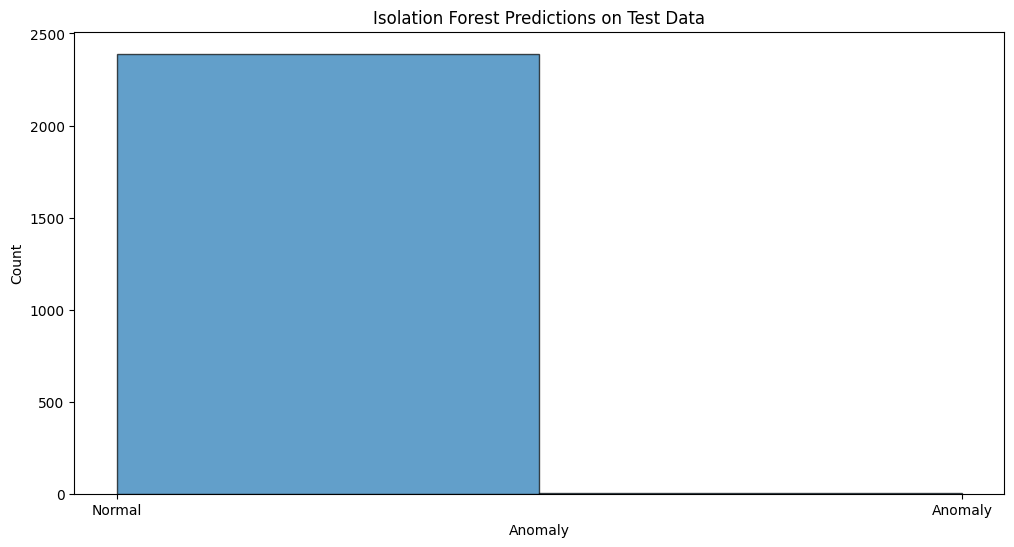

In [31]:
plt.figure(figsize=(12, 6))
plt.hist(y_pred_test, bins=2, edgecolor='k', alpha=0.7)
plt.title('Isolation Forest Predictions on Test Data')
plt.xlabel('Anomaly')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Anomaly'])
plt.show()

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import numpy as np

In [33]:
input_dim = X_train.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="tanh")(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation="tanh")(encoder)
decoder = Dense(input_dim, activation="relu")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_split=0.2, verbose=1)

Epoch 1/50
30/30 [==============================] - 2s 19ms/step - loss: 1.2616 - val_loss: 1.4681
Epoch 2/50
30/30 [==============================] - 0s 6ms/step - loss: 1.2075 - val_loss: 1.4122
Epoch 3/50
30/30 [==============================] - 0s 7ms/step - loss: 1.1550 - val_loss: 1.3618
Epoch 4/50
30/30 [==============================] - 0s 6ms/step - loss: 1.1022 - val_loss: 1.3068
Epoch 5/50
30/30 [==============================] - 0s 5ms/step - loss: 1.0560 - val_loss: 1.2728
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 1.0294 - val_loss: 1.2504
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 1.0112 - val_loss: 1.2343
Epoch 8/50
30/30 [==============================] - 0s 3ms/step - loss: 0.9973 - val_loss: 1.2219
Epoch 9/50
30/30 [==============================] - 0s 3ms/step - loss: 0.9864 - val_loss: 1.2116
Epoch 10/50
30/30 [==============================] - 0s 4ms/step - loss: 0.9773 - val_loss: 1.2031
Epoch 11/50
30/30 

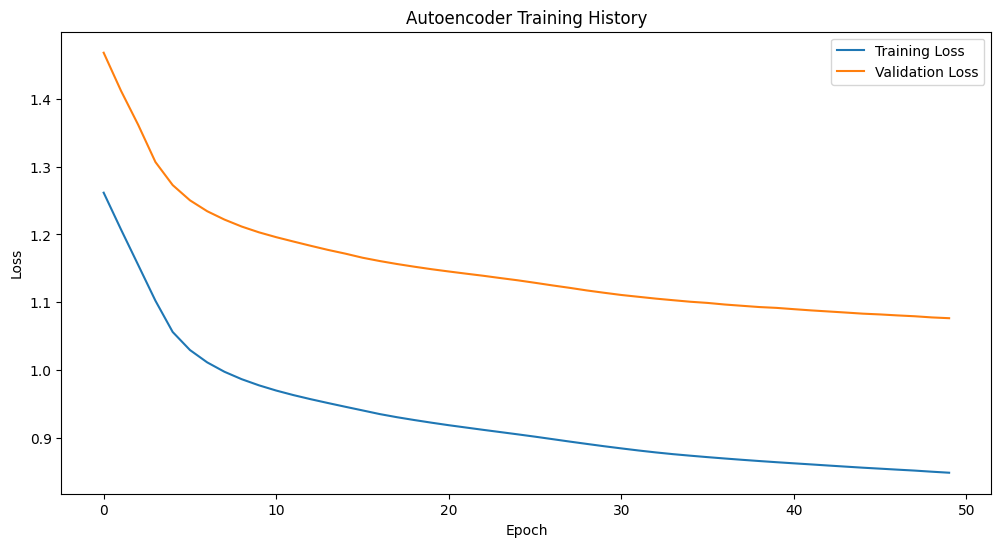

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
X_train_pred = autoencoder.predict(X_train)
X_test_pred = autoencoder.predict(X_test)

train_mse = np.mean(np.power(X_train - X_train_pred, 2), axis=1)
test_mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

threshold = np.percentile(train_mse, 95)  # 95th percentile threshold

y_pred_train_auto = [1 if e > threshold else 0 for e in train_mse]
y_pred_test_auto = [1 if e > threshold else 0 for e in test_mse]

75/75 [==============================] - 0s 1ms/step


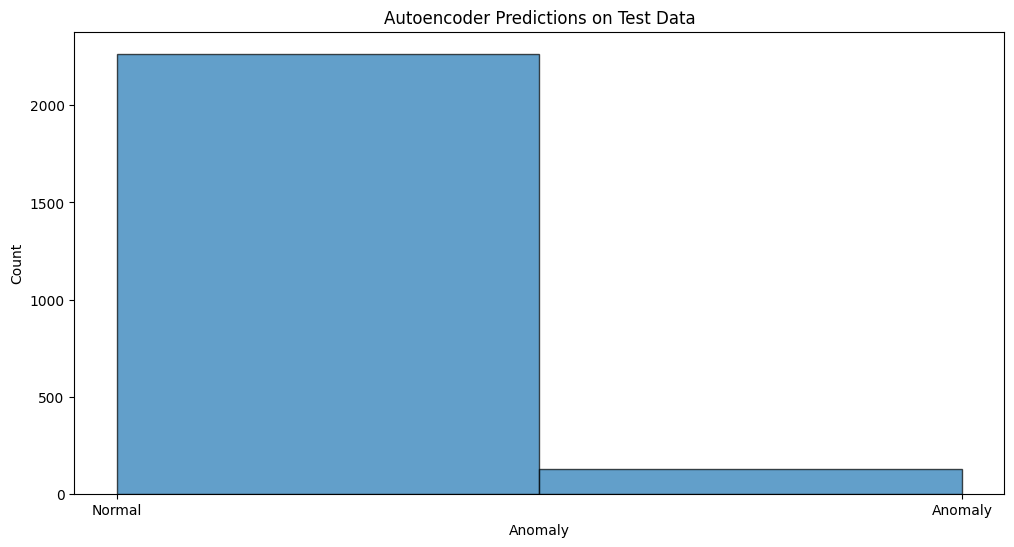

In [37]:
plt.figure(figsize=(12, 6))
plt.hist(y_pred_test_auto, bins=2, edgecolor='k', alpha=0.7)
plt.title('Autoencoder Predictions on Test Data')
plt.xlabel('Anomaly')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Anomaly'])
plt.show()

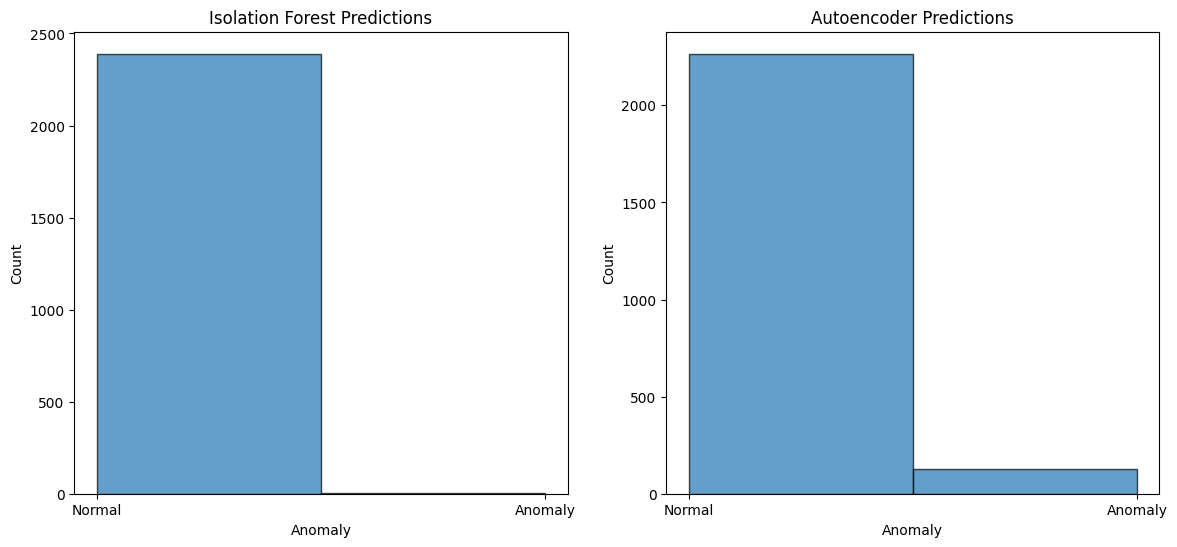

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Isolation Forest
ax[0].hist(y_pred_test, bins=2, edgecolor='k', alpha=0.7)
ax[0].set_title('Isolation Forest Predictions')
ax[0].set_xlabel('Anomaly')
ax[0].set_ylabel('Count')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Normal', 'Anomaly'])

# Autoencoder
ax[1].hist(y_pred_test_auto, bins=2, edgecolor='k', alpha=0.7)
ax[1].set_title('Autoencoder Predictions')
ax[1].set_xlabel('Anomaly')
ax[1].set_ylabel('Count')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Normal', 'Anomaly'])

plt.show()